# Lab 3

## Image processing - Intesnity Transformation

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

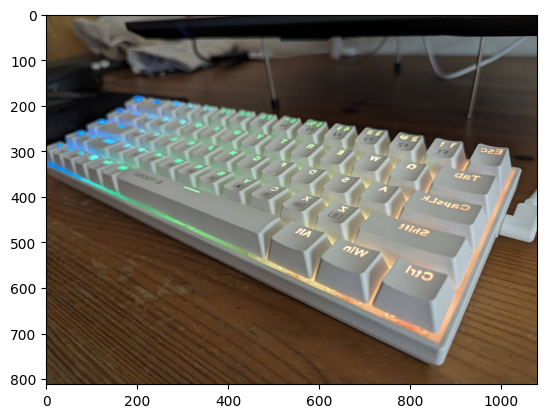

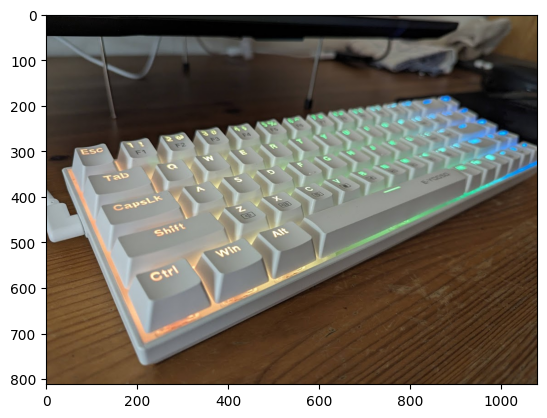

In [12]:
img = cv2.imread('tatiera.jpg')

# Mirrorize reading image backward

height, width = img.shape[:2]
mirrored_image = img[:, width:0:-1]

# Real image
plt.imshow(cv2.cvtColor(mirrored_image, cv2.COLOR_BGR2RGB))
plt.show()

# Mirrorized image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

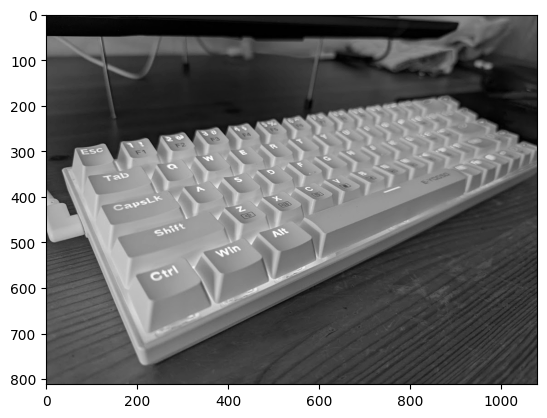

In [13]:
# Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

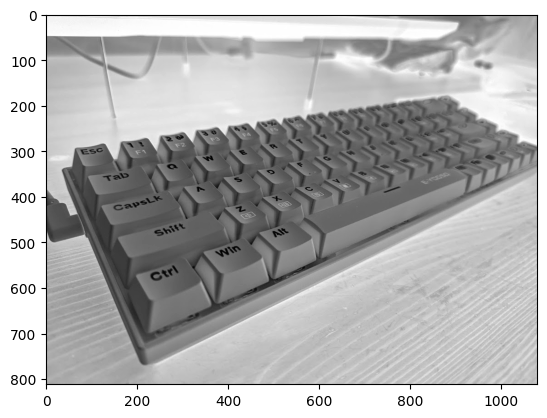

In [14]:
# Negative
new_img = 255 - gray
plt.imshow(new_img, cmap='gray')
plt.show()


## Histogram

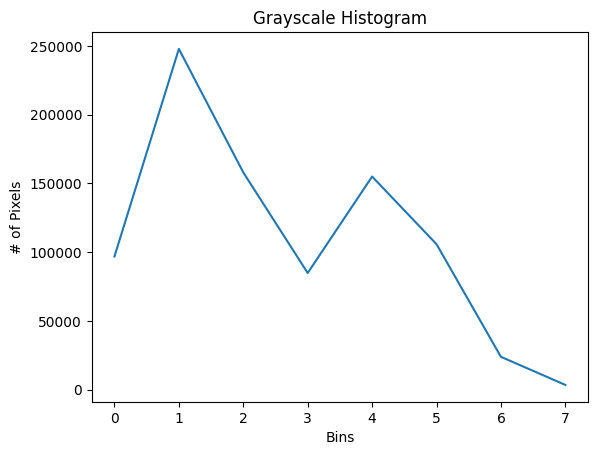

In [15]:
img = cv2.imread('tatiera.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Calculate histogram
hist = cv2.calcHist([gray], [0], None, [8], [0, 256])

# Plot histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)

We can use the method **ravel** to convert an image into a 1D array. This method is useful to create the histogram of an image.

In [16]:
# Print ravel 
print(gray.ravel())
print()
print(gray)

[33 32 23 ... 64 63 61]

[[33 32 23 ... 85 82 97]
 [17 24 21 ... 85 83 94]
 [39 35 28 ... 85 85 90]
 ...
 [86 80 85 ... 61 59 56]
 [86 82 87 ... 63 61 59]
 [87 85 90 ... 64 63 61]]


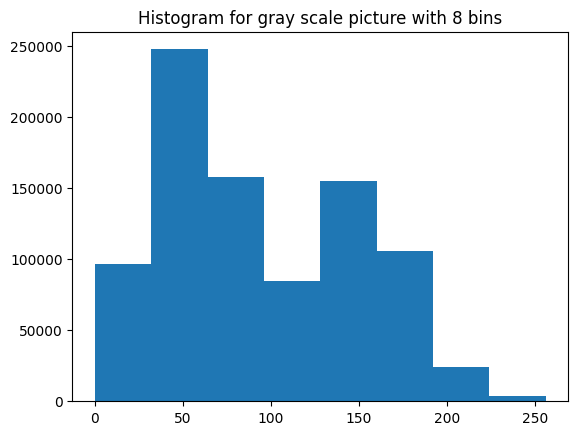

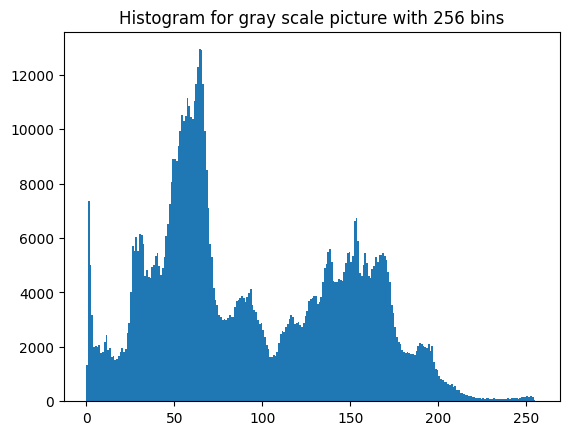

In [17]:
# Another way to plot instogram

plt.figure()
plt.hist(gray.ravel(), 8, [0, 256])
plt.title('Histogram for gray scale picture with 8 bins')
plt.show()

plt.figure()
plt.hist(gray.ravel(), 256, [0, 256])
plt.title('Histogram for gray scale picture with 256 bins')
plt.show()



### Hist for colors

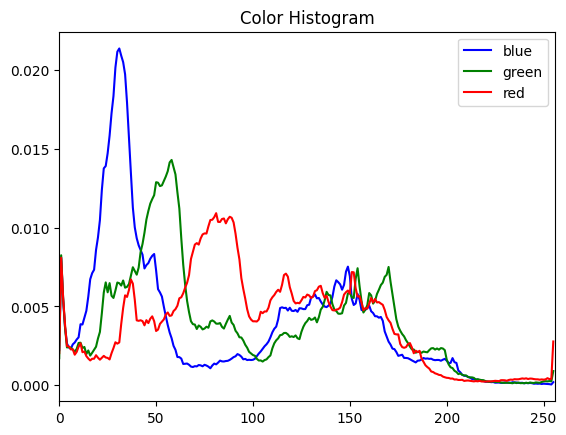

In [18]:
img = cv2.imread('tatiera.jpg')

channels = cv2.split(img)
colors = ('b', 'g', 'r')

plt.figure()
plt.title("Color Histogram")
# for each channel
for (chan,color) in zip(channels, colors):
    # create hist for the current channel we are analyzing
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    hist = hist / hist.sum() # This is done for normalization
    # because the number of pixels in each channel is different
    plt.plot(hist, color = color)
    plt.xlim([0, 256])

plt.legend(['blue', 'green', 'red'])
plt.show()

### Histogrma equalization

This is done in order to increase the range of pixel values in the image. It leads to more uniform histogram.

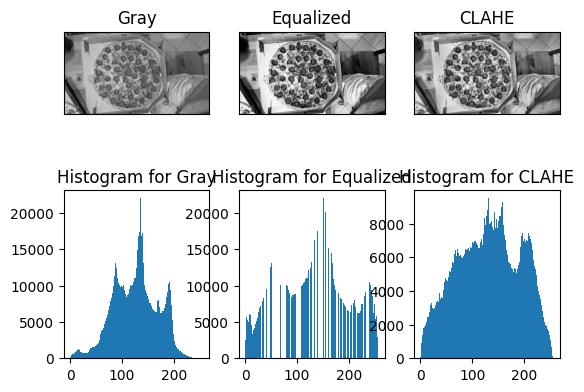

In [19]:
dominos = cv2.imread('dominos.jpg')
gray = cv2.cvtColor(dominos, cv2.COLOR_BGR2GRAY)

# Histrogram equalization using method equalistHist
equalized = cv2.equalizeHist(gray)

# Contrast limited adapted instrogram equalization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(gray)

# do a 2x3 subplot for image and its histogram

images = [gray, equalized, clahe_img]
titles = ['Gray', 'Equalized', 'CLAHE']

for i in range(3):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    plt.subplot(2, 3, i+4)
    plt.hist(images[i].ravel(), 256, [0, 256])
    plt.title('Histogram for ' + titles[i])

plt.show()

# Filtering

In [26]:
# dst = cv2.filter2D (src, ddepth, kernel)

# src - input image
# ddepth - desired depth of the destination image
# kernel - convolution kernel



Low Pass Filter

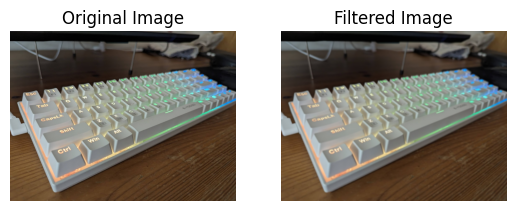

In [27]:

img = cv2.imread('tatiera.jpg')

# Create a 6x6 kernel
n1 = 6
kernel1 = np.ones((n1, n1), np.float32) / (n1 * n1)

filtered_img = cv2.filter2D(img, -1, kernel1)

# show both imags
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB))
plt.title('Filtered Image')
plt.axis('off')

plt.show()



Weighted low pass

In [29]:
finger_print = cv2.imread('noisy-fingerprint.tif')

# Now we do it with a weighted filter

weighted_kernel = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
])

weighted_kernel = weighted_kernel / np.sum(weighted_kernel)

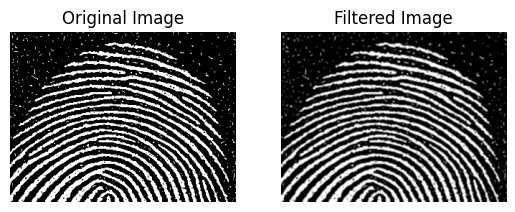

In [30]:
# Apply the kernel to the images

filtered_img = cv2.filter2D(finger_print, -1, weighted_kernel)

# show both imags
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(finger_print, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB))
plt.title('Filtered Image')
plt.axis('off')

plt.show()

### Gauissian Kernel

In [ ]:
# cv2.getGaussianKernel(ksize, sigma[, ktype])
# ksize - size of the filter
# sigma - standard deviation of the filter
# ktype - type of the filter

# Or you can use gauissianBlur

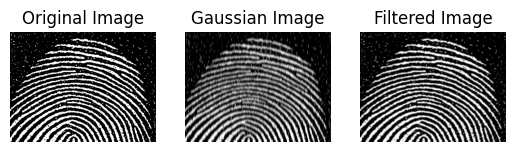

In [35]:
kernel = cv2.getGaussianKernel(9,2)
gaussian = cv2.filter2D(finger_print, -1, kernel)
# gaussian2 = cv2.GaussianBlur(finger_print, (9, 9), 2)
# show both imags
plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(finger_print, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(gaussian, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB))
plt.title('Filtered Image')
plt.axis('off')

plt.show()

### Order filtering

#### Median filter

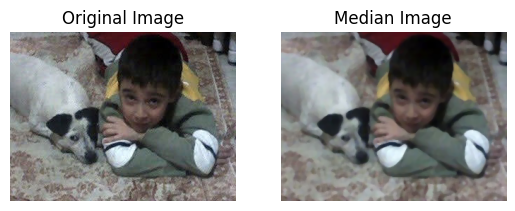

In [37]:
# use medianBlur()

me_and_max = cv2.imread(filename="meandmax.jpg")

# Apply median filter
median = cv2.medianBlur(me_and_max, 5)

# show both imags
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(me_and_max, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
plt.title('Median Image')
plt.axis('off')

plt.show()

### High pass filtering

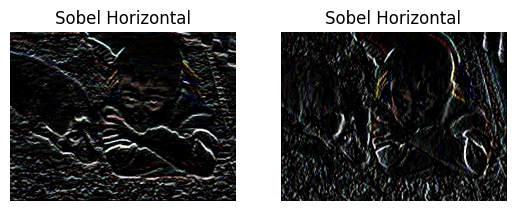

In [41]:
# Sobel 
# Horizontal
k_h = np.array([
[-1, -2, -1],
[0, 0, 0],
[1, 2, 1]])
# Vertical
k_v = np.array([
[-1, 0, 1],
[-2, 0, 2],
[-1, 0, 1]]
)

# Apply the kernel to the images
sobel_h = cv2.filter2D(me_and_max, -1, k_h)
sobel_v = cv2.filter2D(me_and_max, -1, k_v)

# show both imags
plt.figure()

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(sobel_h, cv2.COLOR_BGR2RGB))
plt.title('Sobel Horizontal')
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(sobel_v, cv2.COLOR_BGR2RGB))
plt.title('Sobel Horizontal')
plt.axis('off')

plt.show()



### Laplacialian filter

A Laplacian filter is an edge detector used to compute the second derivatives of an image, measuring the rate at which the first derivatives change.

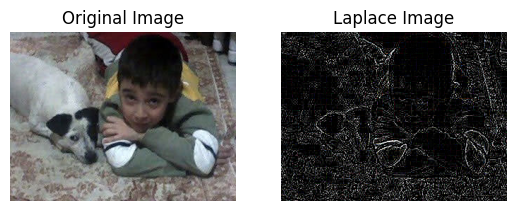

In [47]:
laplace_kernel = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]])

laplace = cv2.filter2D(me_and_max, -1, laplace_kernel)

# show both imags
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(me_and_max, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(laplace, cv2.COLOR_BGR2RGB))
plt.title('Laplace Image')
plt.axis('off')

plt.show()





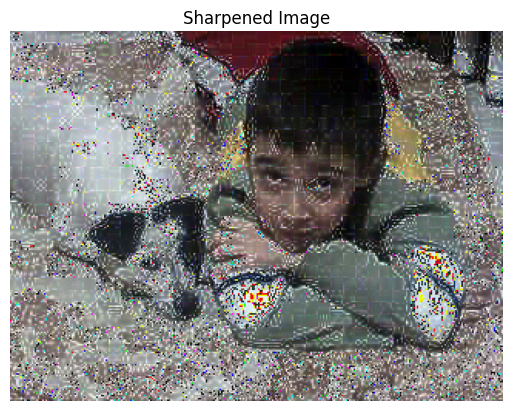

In [48]:
# Make the original image sharper usign the laplace filter

sharpened = me_and_max + laplace

plt.figure()
plt.imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB))
plt.title('Sharpened Image')
plt.axis('off')

plt.show()



### Unsharp masking

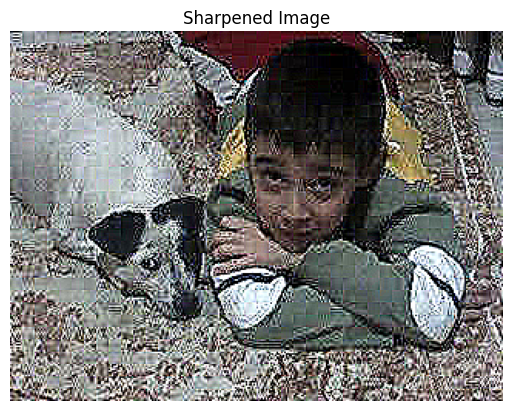

In [49]:
k_sharp = np.array([
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]
])

sharpened = cv2.filter2D(me_and_max, -1, k_sharp)

plt.figure()
plt.imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB))
plt.title('Sharpened Image')
plt.axis('off')

plt.show()

